In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Read Image

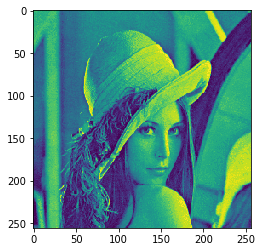

In [2]:
def readpgm(name):
    with open(name) as f:
         lines = f.readlines()

    for l in list(lines):
        if l[0] == '#':
            lines.remove(l)

    assert lines[0].strip() == 'P2' 

    data = []
    for line in lines[1:]:
        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm('lena.pgm')
img_data = np.reshape(data[0],data[1])
plt.imshow(img_data)

## Write Image

In [3]:
width = img_data.shape[0]
height = img_data.shape[1]
arr = img_data

filename = 'lena_output.pgm'
fout=open(filename, 'wb')

pgmHeader = 'P2' + ' ' + str(width) + ' ' + str(height) + ' ' + str(255) +  '\n'

pgmHeader_byte = bytearray(pgmHeader,'utf-8')

fout.write(pgmHeader_byte)

img = np.reshape(arr,(height,width))

for j in range(height):
    bnd = list(img[j,:])
    bnd_str = np.char.mod('%d',bnd)
    bnd_str = np.append(bnd_str,'\n')
    bnd_str = [' '.join(bnd_str)][0]    
    bnd_byte = bytearray(bnd_str,'utf-8')        
    fout.write(bnd_byte)

fout.close()